In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel("veri1.xlsx")
df[:16]

,<<PMCA SPECTRUM>>,<<PMCA SPECTRUM>>.1
0,TAG - live_data,TAG - live_data
1,DESCRIPTION -,DESCRIPTION -
2,GAIN - 1,GAIN - 1
3,THRESHOLD - 3,THRESHOLD - 3
4,LIVE_MODE - 0,LIVE_MODE - 0
5,PRESET_TIME - 600,PRESET_TIME - 600
6,LIVE_TIME - 600.000000,LIVE_TIME - 600.000000
7,REAL_TIME - 602.906667,REAL_TIME - 602.546667
8,START_TIME - 01/20/2021 12:34:45,START_TIME - 01/20/2021 12:47:03
9,SERIAL_NUMBER - 4055,SERIAL_NUMBER - 4055


In [4]:
def calibrationfunc(x):
    m=(1173-662)/(245-142)
    n=662-m*142
    y=m*x+n
    return y

In [7]:
y=calibrationfunc(df2.index)

In [8]:
y

Float64Index([ -42.48543689320388,  -37.52427184466019,   -32.5631067961165,
              -27.601941747572816, -22.640776699029125, -17.679611650485434,
              -12.718446601941746,  -7.757281553398059, -2.7961165048543677,
               2.1650485436893234,
              ...
               2448.0194174757285,   2452.980582524272,  2457.9417475728155,
               2462.9029126213595,   2467.864077669903,  2472.8252427184466,
               2477.7864077669906,   2482.747572815534,  2487.7087378640776,
               2492.6699029126216],
             dtype='float64', length=512)

In [5]:
df2=df[17:-1]
df2

,<<PMCA SPECTRUM>>,<<PMCA SPECTRUM>>.1
17,0,0
18,0,0
19,0,0
20,745,667
21,860,795
...,...,...
524,0,0
525,0,0
526,0,0
527,0,0


In [6]:
df2=df2.reset_index(drop=True)
df2.columns=["Al","Background"]
df2

,Al,Background
0,0,0
1,0,0
2,0,0
3,745,667
4,860,795
...,...,...
507,0,0
508,0,0
509,0,0
510,0,0


In [25]:
df3=df2[1600:1900]

Text(0.5, 1.0, 'Al Neutron Activation')

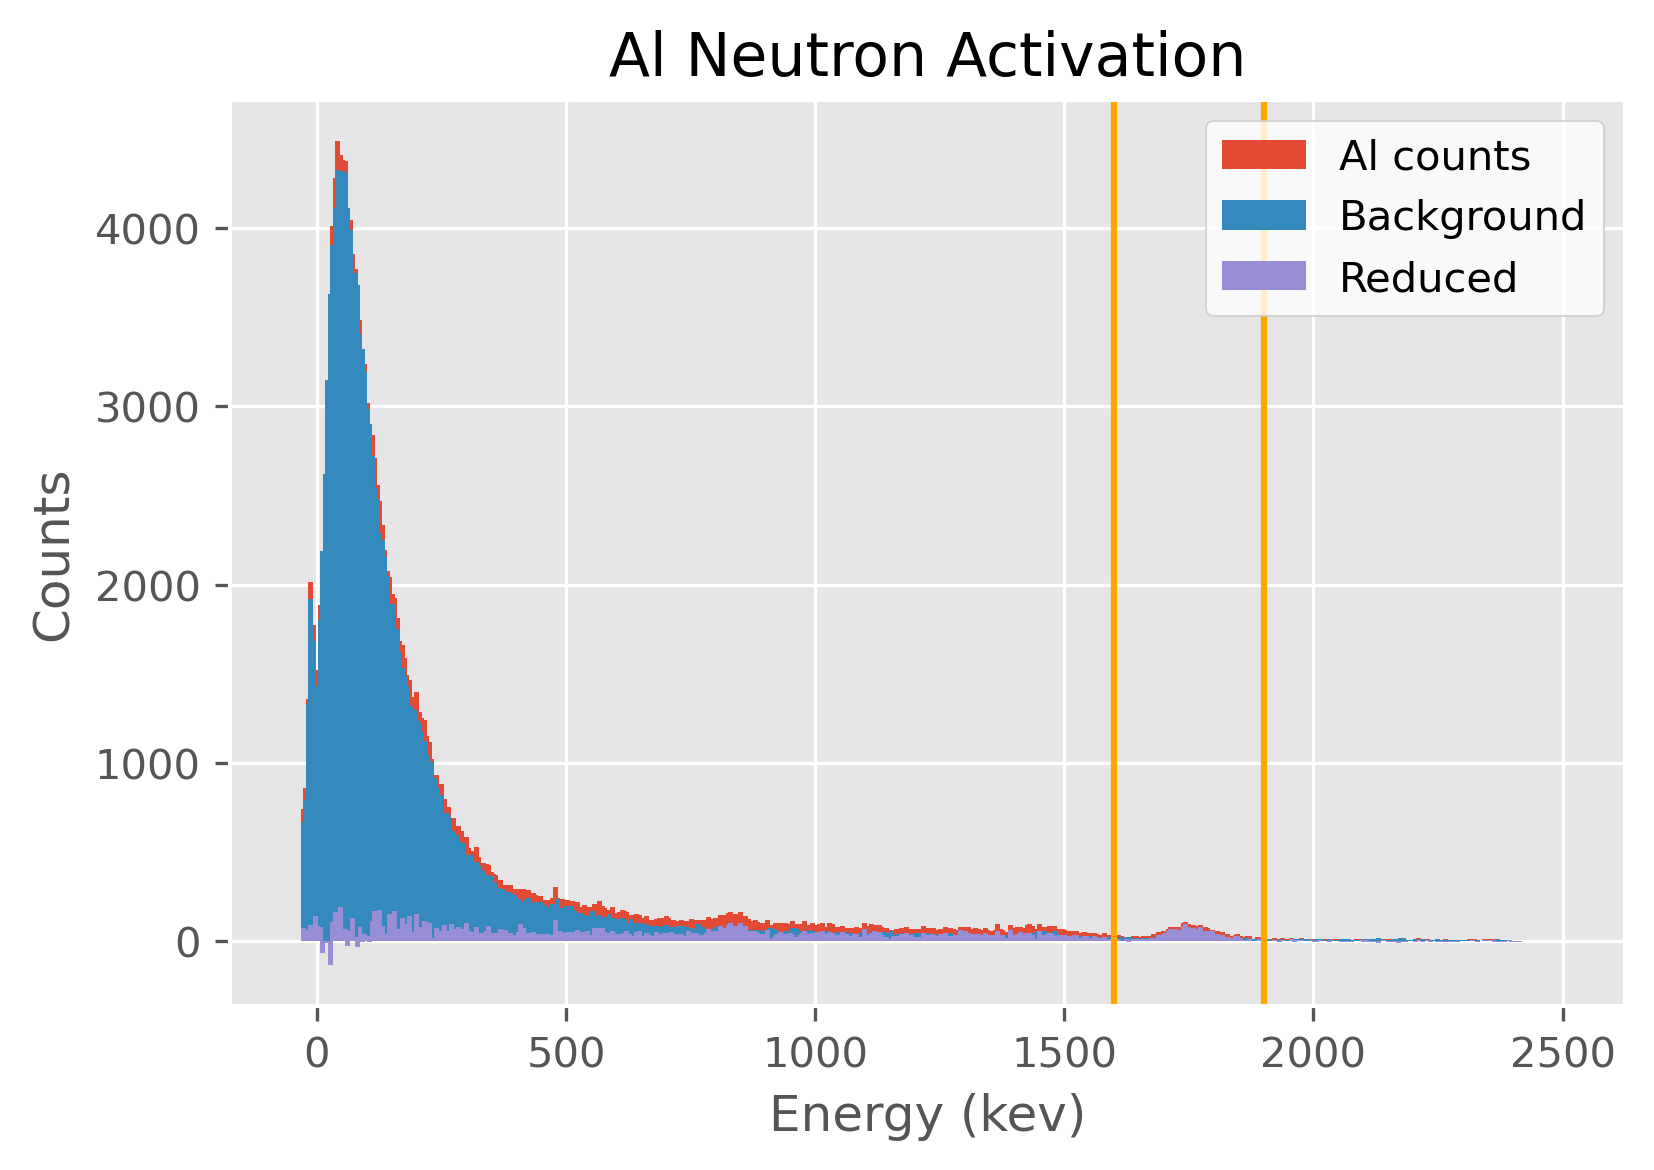

In [68]:
plt.figure(dpi=300)

plt.style.use('ggplot')
plt.bar(df2.index,df2["Al"],width=10,label="Al counts")
plt.bar(df2.index,df2["Background"],width=10,label="Background")
plt.bar(df2.index,df2["Clear"],width=10,label="Reduced")
#plt.bar(df2.index,abs(df2["Clear"]),width=10)
plt.axvline(x=1600,c="orange")
plt.axvline(x=1900,c="orange")
plt.legend(loc ='upper right',facecolor="white")
plt.xlabel("Energy (kev)")
plt.ylabel("Counts")

plt.title("Al Neutron Activation")

Text(0.5, 1.0, 'Al Neutron Activation')

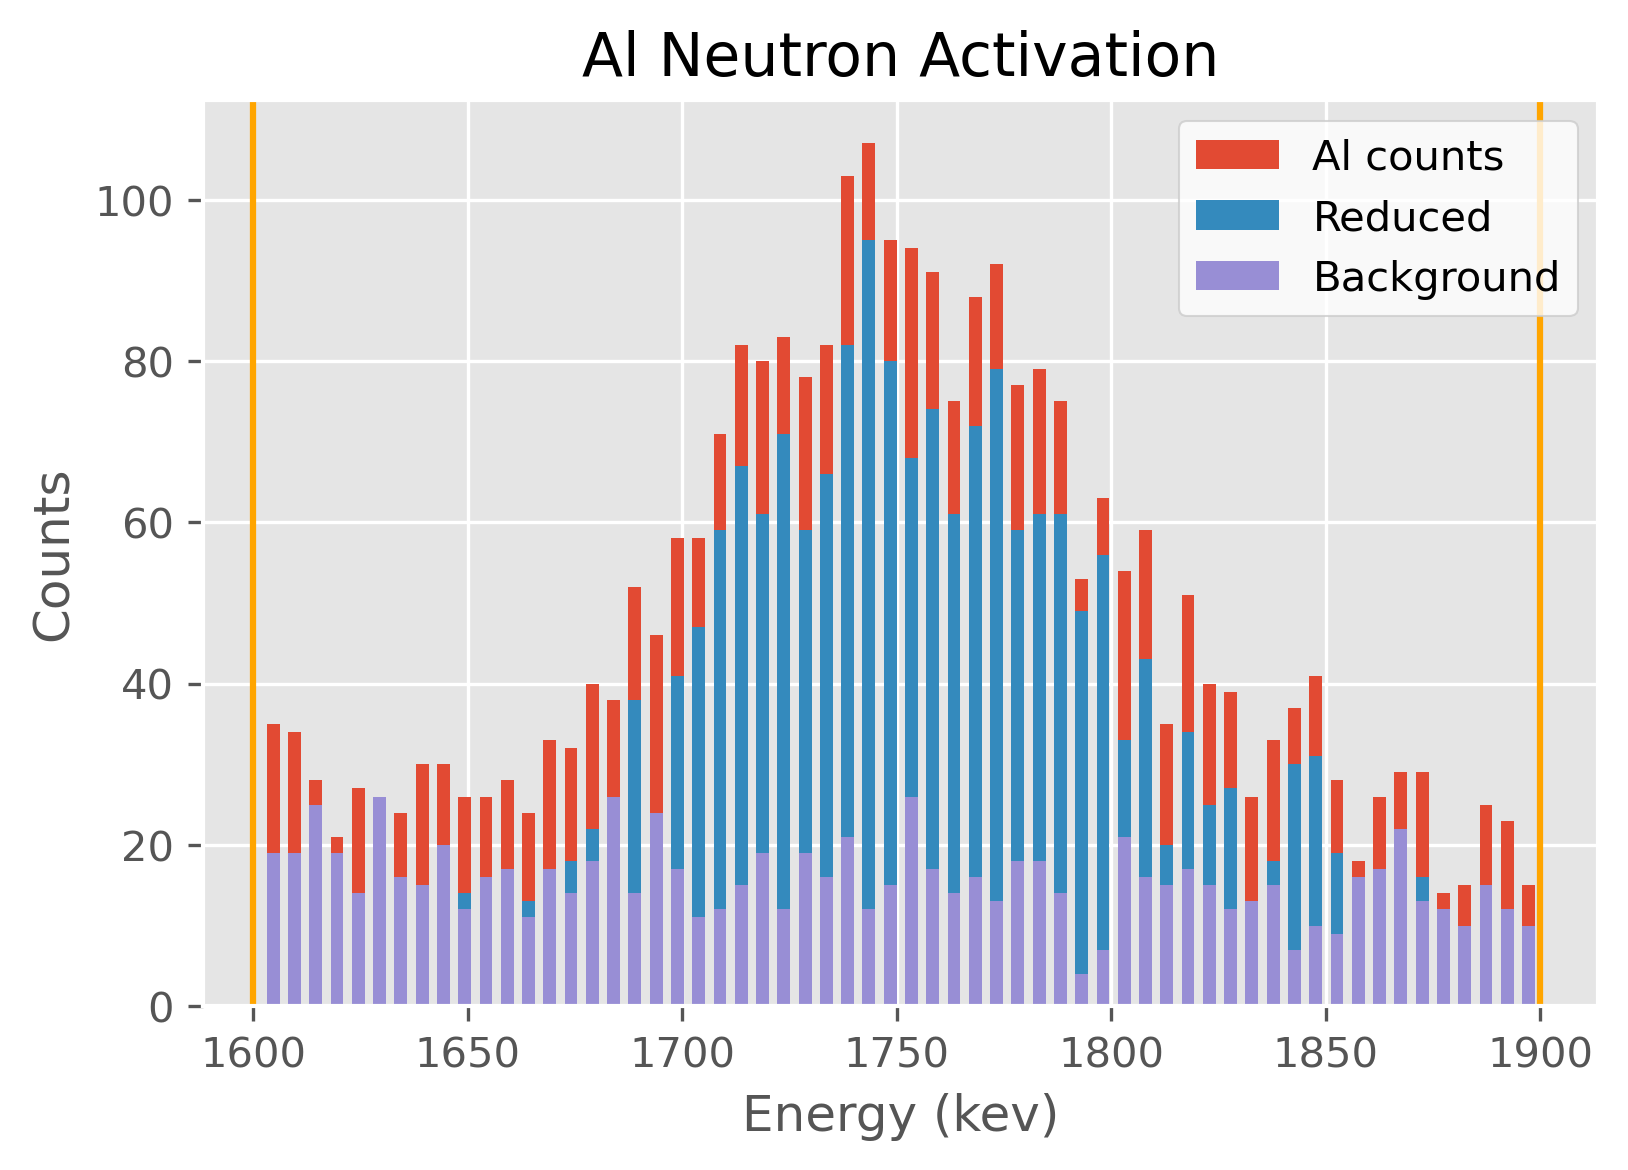

In [35]:
plt.figure(dpi=300)

plt.style.use('ggplot')
plt.bar(df3.index,df3["Al"],width=3,label="Al counts")
plt.bar(df3.index,abs(df3["Clear"]),width=3,label="Reduced")
plt.bar(df3.index,df3["Background"],width=3,label="Background")
plt.axvline(x=1600,c="orange")
plt.axvline(x=1900,c="orange")
plt.legend(loc ='upper right',facecolor="white")
plt.xlabel("Energy (kev)")
plt.ylabel("Counts")

plt.title("Al Neutron Activation")

In [9]:
df2["Clear"]=df2["Al"]-df2["Background"]

In [10]:
df2["Energy"]=y

In [11]:
df2.set_index("Energy",inplace=True)

In [ ]:
df2[1700:1800]
df2.index[df2.loc[1500:]["Clear"]==df2.loc[1500:].Clear.max()]

In [40]:
df3.index[df3.Clear==95]  # peak noktanın enerjisi

Float64Index([1743.5339805825242], dtype='float64', name='Energy')

In [49]:
y2=df3.loc[1600:1900].index.tolist()

In [50]:
x2=df3.loc[1600:1900].Clear.tolist()

In [57]:
enerji=np.array(y2)
sayim=np.array(x2)

In [66]:
weights=abs(sayim/sum(sayim))

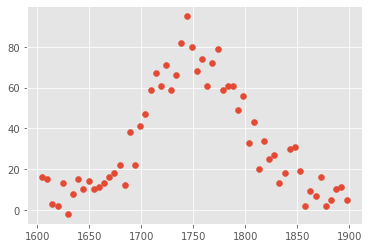

In [56]:
plt.scatter(y2,x2)

In [67]:
sum(enerji*weights) #ağırlıklı ortalama

1756.4813850610706

In [69]:
sum(sayim**2)

106320

In [82]:
c=1/sum((sayim**2)*5)

In [83]:
c

1.8811136192626035e-06

In [84]:
c*sum(enerji*(sayim**2)*5) # beklenen değer

1752.4106956833002

In [78]:
enerji.mean()

1750.9757281553398

In [79]:
len(enerji)

60

In [85]:
sum(enerji)/60

1750.9757281553398